# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [61]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [62]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response=requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arklow
Processing Record 2 of Set 1 | altentreptow
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | uray
Processing Record 5 of Set 1 | san julian
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | tadine
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | vyalikaya byerastavitsa
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | kyongsong
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | kapuskasing
Processing Record 18 of Set 1 | sinabang
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | nantucket
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | tamanrass

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0  port saint john's -31.6229   29.5448    290.08        59          74   
1  cornelio procopio -23.1811  -50.6467    293.72        40           0   
2            ushuaia -54.8000  -68.3000    269.96        74           0   
3           rongelap  11.1635  166.8941    301.28        81          24   
4           beberibe  -4.1797  -38.1306    298.88        87           9   

   Wind Speed Country        Date  
0        2.76      ZA  1718140890  
1        1.52      BR  1718140891  
2        1.54      AR  1718140829  
3        9.14      MH  1718140892  
4        3.53      BR  1718140892

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
0        port saint john's -31.6229   29.5448    290.08        59          74   
1        cornelio procopio -23.1811  -50.6467    293.72        40           0   
2                  ushuaia -54.8000  -68.3000    269.96        74           0   
3                 rongelap  11.1635  166.8941    301.28        81          24   
4                 beberibe  -4.1797  -38.1306    298.88        87           9   

         Wind Speed Country        Date  
City_ID                                  
0              2.76      ZA  1718140890  
1              1.52      BR  1718140891  
2              1.54      AR  1718140829  
3              9.14      MH  1718140892  
4              3.53      BR  1718140892

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

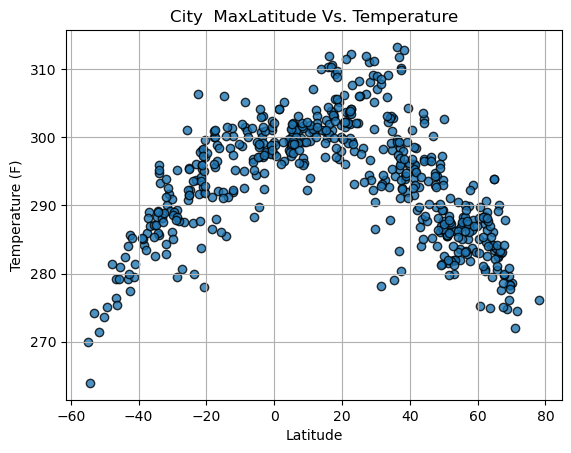

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City  MaxLatitude Vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

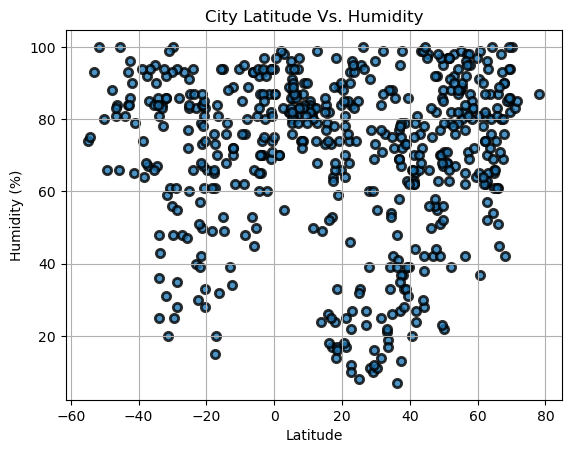

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],
           edgecolor="black", linewidth=2, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

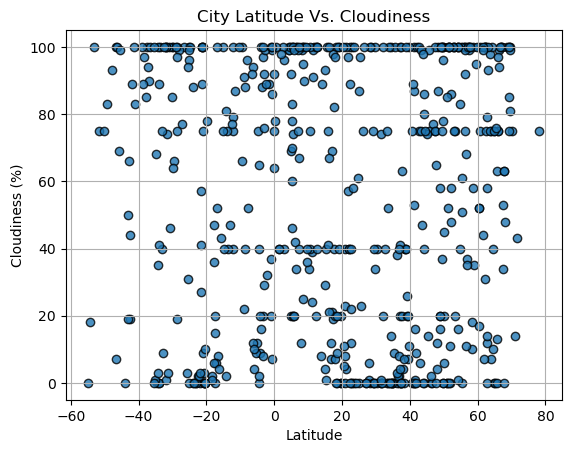

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness") 
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

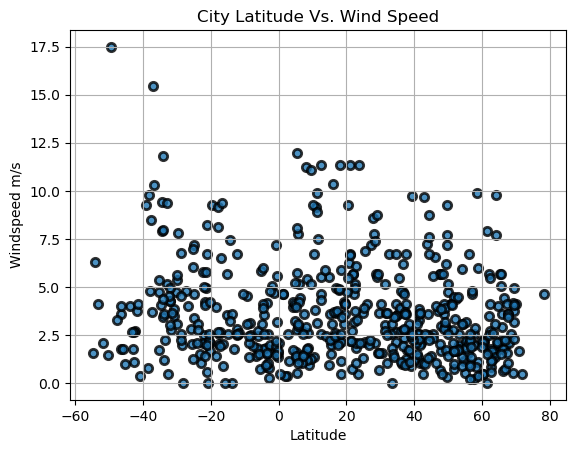

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],
           edgecolor="black", linewidth=2, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed")
plt.ylabel("Windspeed m/s")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots

def plt_linear_regression(x_values,y_values,title,text_coordi):
    
    # Run regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordi, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                  
3                      rongelap  11.1635  166.8941    301.28        81   
5                        anadyr  64.7500  177.4833    283.43        66   
6                      chaoyang  41.5703  120.4586    294.93        65   
7        hawaiian paradise park  19.5933 -154.9731    301.88        66   
9                        harper   4.3750   -7.7169    299.49        82   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
3                24        9.14      MH  1718140892  
5                 0        4.00      RU  1718140892  
6                 0        1.05      CN  1718140893  
7                20        3.60      US  1718140893  
9               100        3.94      LR  1718140894

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]


# Display sample data
southern_hemi_df.head()

City      Lat      Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                        
0        port saint john's -31.6229  29.5448    290.08        59          74   
1        cornelio procopio -23.1811 -50.6467    293.72        40           0   
2                  ushuaia -54.8000 -68.3000    269.96        74           0   
4                 beberibe  -4.1797 -38.1306    298.88        87           9   
8                grytviken -54.2811 -36.5092    263.93        75          18   

         Wind Speed Country        Date  
City_ID                                  
0              2.76      ZA  1718140890  
1              1.52      BR  1718140891  
2              1.54      AR  1718140829  
4              3.53      BR  1718140892  
8              6.32      GS  1718140894

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.7644281519661542


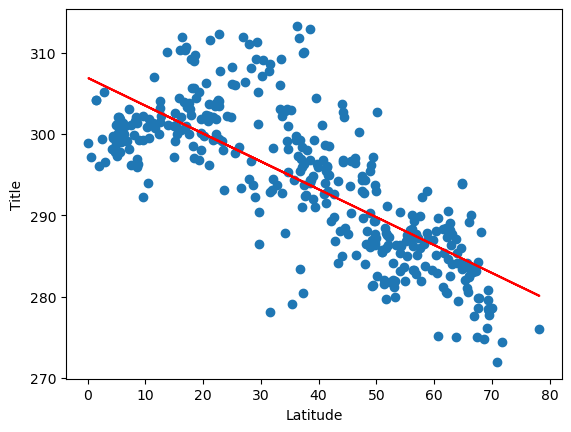

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt_linear_regression(x_values,y_values, 'Max Temp', (6,40))

The r-squared is: 0.8056722675762918


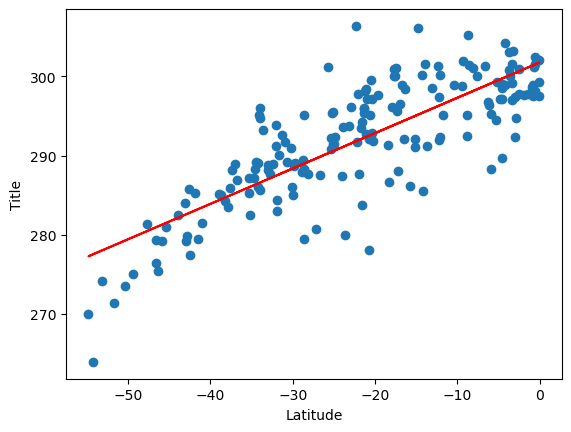

In [ ]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.074509324448708


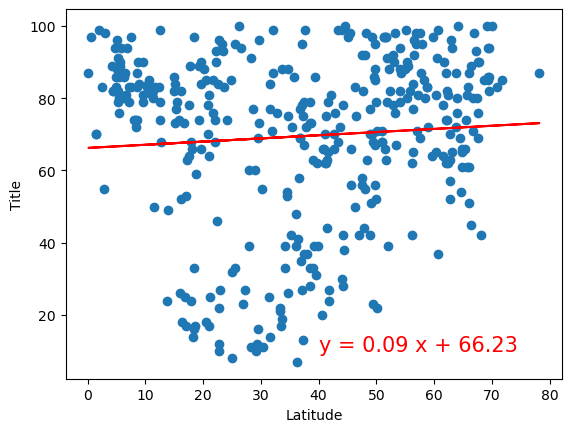

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.026733858602049174


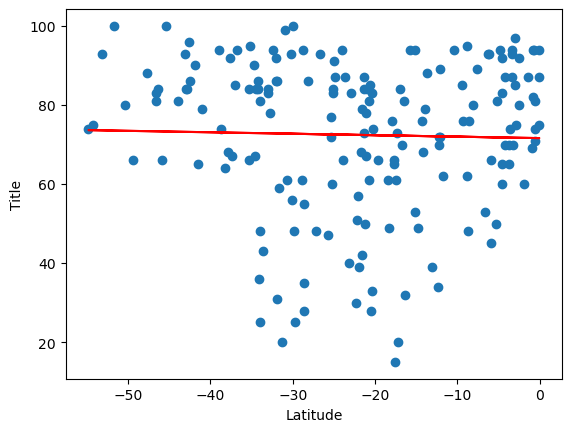

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05163078019289167


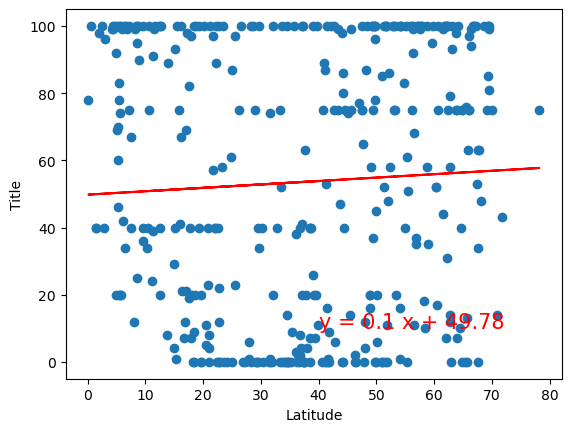

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: -0.07609850999368861


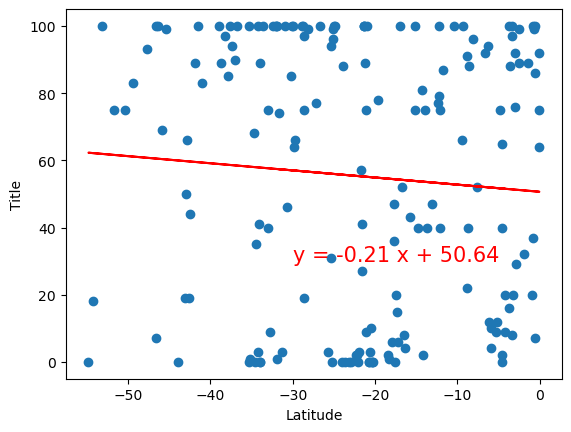

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plt_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 177 and the array at index 1 has size 381

The r-squared is: -0.2451345515064071


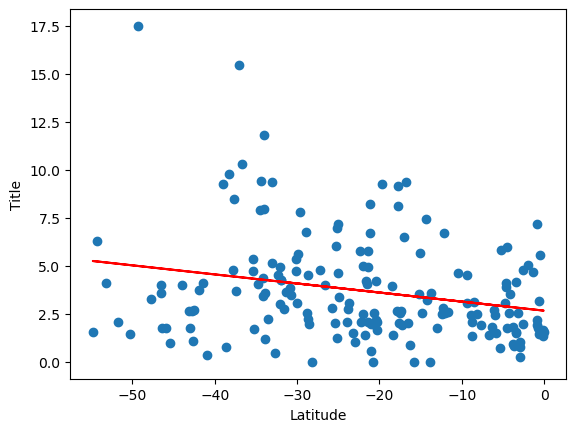

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plt_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE